In [1]:
#We are going to apply a model ensemble in python to build a regression predictive model

In [9]:
# The median value of owner occupied homes will be predicted using predictive attributes in the Boston housing tract data of Harrison and Rubinfeld where each row of data represents as suburb 

In [8]:
# Each record represents a suburb and the attributes are defined as follows:

#1. MV: Median value of owner-occupied homes in $1000s
#2. INDUS: proportion of non-retail business acres per town
#3. NOX: nitric oxides concentration (parts per 10 million)
#4. RM: average number of rooms per dwelling
#5. TAX: full-value property-tax rate per $10,000
#6. PT: pupil-teacher ratio by town
#7. LSTAT: % lower status of the population



In [4]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [21]:
# Load dataset (specifying the short names for each attribute so)
filename = 'C:/Users/kowoyokun/Desktop/Boston.csv' 
dataset = read_csv(filename)


In [22]:
dataset

,MV,INDUS,NOX,RM,TAX,PT,LSTAT
0,24.0,2.3,53.8,6.6,296,15.3,5.0
1,21.6,7.1,46.9,6.4,242,17.8,9.1
2,34.7,7.1,46.9,7.2,242,17.8,4.0
3,33.4,2.2,45.8,7.0,222,18.7,2.9
4,36.2,2.2,45.8,7.1,222,18.7,5.3
5,28.7,2.2,45.8,6.4,222,18.7,5.2
6,22.9,7.9,52.4,6.0,311,15.2,12.4
7,27.1,7.9,52.4,6.2,311,15.2,19.1
8,16.5,7.9,52.4,5.6,311,15.2,29.9
9,18.9,7.9,52.4,6.0,311,15.2,17.1


In [23]:
# To describe by summarizing dataset using Python and Pandas:
# dimension of data 
print(dataset.shape)


# shape
print(dataset.shape)
# types
print(dataset.dtypes)

# descriptions
set_option('precision', 1)
print(dataset.describe())



(506, 7)
(506, 7)
MV       float64
INDUS    float64
NOX      float64
RM       float64
TAX        int64
PT       float64
LSTAT    float64
dtype: object
          MV  INDUS    NOX     RM    TAX     PT  LSTAT
count  506.0  506.0  506.0  506.0  506.0  506.0  506.0
mean    22.5   11.1   55.5    6.3  408.2   18.5   12.7
std      9.2    6.9   11.6    0.7  168.5    2.2    7.1
min      5.0    0.5   38.5    3.6  187.0   12.6    1.7
25%     17.0    5.2   44.9    5.9  279.0   17.4    6.9
50%     21.2    9.7   53.8    6.2  330.0   19.1   11.4
75%     25.0   18.1   62.4    6.6  666.0   20.2   17.0
max     50.0   27.7   87.1    8.8  711.0   22.0   38.0


In [24]:
#The min and max value as well as the means vary a lot and I will consider scaling the data to achieve a beter result.



In [25]:
# correlation to check for multicollinearity
set_option('precision', 2)
print(dataset.corr(method='pearson'))


         MV  INDUS   NOX    RM   TAX    PT  LSTAT
MV     1.00  -0.48 -0.43  0.70 -0.47 -0.51  -0.74
INDUS -0.48   1.00  0.76 -0.39  0.72  0.38   0.60
NOX   -0.43   0.76  1.00 -0.30  0.67  0.19   0.59
RM     0.70  -0.39 -0.30  1.00 -0.29 -0.36  -0.61
TAX   -0.47   0.72  0.67 -0.29  1.00  0.46   0.54
PT    -0.51   0.38  0.19 -0.36  0.46  1.00   0.37
LSTAT -0.74   0.60  0.59 -0.61  0.54  0.37   1.00


In [27]:
# Correaltion analysis shows that the highest levels of correlation pairings to be:
#INDUS and NOX- 0.76
#INDUS and TAX - 0.72
# MV and RM: 0.70


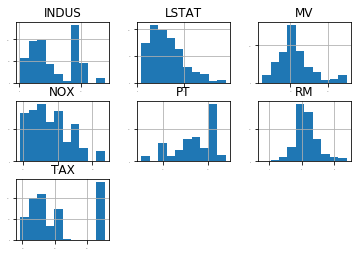

In [28]:
# View data using multiple different visualizations to generate ideas
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()


In [30]:
# We can see that some attributes may have an exponential distribution in LSTAT
# A bimodal distribution in variables such as INDUS, PT and TAX.


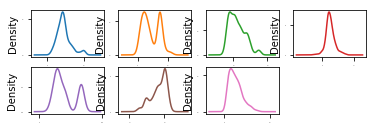

In [31]:
# Also do a density to buttress the information from the histrograms
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()


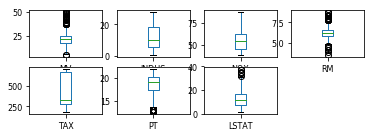

In [33]:
# box and whisker plots to show the distribution of data point out the skew in many distributions and check for outliers
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()


In [35]:
#Insights from exploration of data
#I will consider
# 1) Feature selection and removing the most correlated attributes.
#2) Normalizing the dataset to reduce the effect of differing scales.
#3) Standardizing the dataset to reduce the effects of differing distributions.

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:7]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)



In [45]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


In [49]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


In [50]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -24.978437 (8.878220)
LASSO: -27.911172 (10.904869)
EN: -30.084236 (11.687542)
KNN: -22.755461 (10.340133)
CART: -27.122649 (13.065263)
SVR: -65.216141 (26.017974)


C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\svm\base.py:

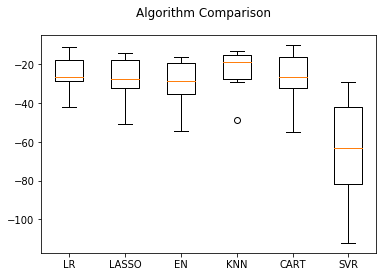

In [51]:
# The logstic regression algoarthm has the lowest mse
# To Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [52]:
# Algorathm comparism shows differing distribution espeically for SVR hence the need to standardize the data
# The data is transformed such that each attribute has a mean value of zero and a standard deviation of 1
# pipelines that standardize the data and build the model for each fold in the cross-validation test harness to avoid leakage

In [54]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -24.978437 (8.878220)
ScaledLASSO: -26.588892 (8.842714)
ScaledEN: -28.942769 (10.619389)
ScaledKNN: -14.556983 (8.403599)
ScaledCART: -22.654042 (7.791577)
ScaledSVR: -23.586126 (13.237860)


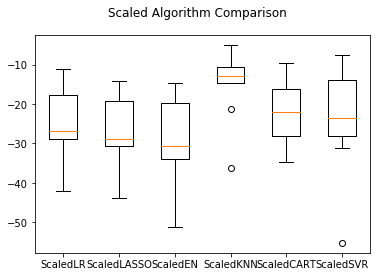

In [55]:
# Now to take another look to Compare Algorithms that used standardized dataset
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [60]:
#comparism shows that KNN performed the best when using scaled data
# I wil improve the Results of the KNN algorathm With Tuning using a grid search og different numbers of neighbors 
# To try try different odd k values from 1 to 21 and evaluate each value of K using 10-fold cross-validation on a standardized copy of the training dataset.

# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)



C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
# display the mean and standard deviation scores as well as the best performing value for k below.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -15.015740 using {'n_neighbors': 5}
-16.586089 (8.452268) with: {'n_neighbors': 1}
-15.133669 (8.810105) with: {'n_neighbors': 3}
-15.015740 (8.542725) with: {'n_neighbors': 5}
-16.522009 (8.841823) with: {'n_neighbors': 7}
-17.229713 (9.681070) with: {'n_neighbors': 9}
-18.085286 (10.145019) with: {'n_neighbors': 11}
-18.517286 (10.322330) with: {'n_neighbors': 13}
-18.885589 (10.249649) with: {'n_neighbors': 15}
-19.364630 (10.657965) with: {'n_neighbors': 17}
-19.712352 (10.384285) with: {'n_neighbors': 19}
-19.825801 (10.343975) with: {'n_neighbors': 21}


In [63]:
# I will also attempt to improve the performance of algorithms on this problem is by using ensemble methods
# Using four different ensemble machine learning algorithms:
#Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
# Bagging Methods: Random Forests (RF) and Extra Trees (ET).

# The ensemble method will still use the same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)




ScaledAB: -14.632694 (6.265766)
ScaledGBM: -10.096447 (5.703282)
ScaledRF: -12.995287 (6.757847)


C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensem

ScaledET: -11.392119 (5.522946)


C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\ensem

In [64]:
# the mean squared error for each method shows better scores than our linear and nonlinear algorithms in previous sections.
# With the Gradient Boosting (GBM) performing best

#ScaledAB: -14.632694 (6.265766)
#ScaledGBM: -10.096447 (5.703282)
# ScaledRF: -12.995287 (6.757847)
#ScaledET: -11.392119 (5.522946)



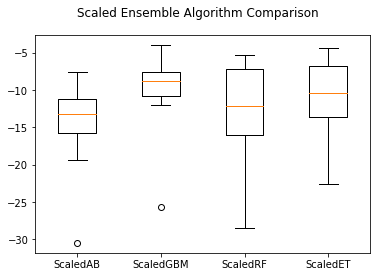

In [65]:
# To Compare the Ensemble Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [66]:
# Figue shows that Gradient Boosting has the best mean score

In [67]:
# Now tune the number of stages for gradient boosting using a parameter grid n estimators values from 50 to 400 in increments of 50 
# And evaluate it using 10-fold cross-validation.
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)


grid_result = grid.fit(rescaledX, Y_train)




C:\Users\kowoyokun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
# summarizing the best configuration and get idea of how performance changed with each different con_guration

("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


-10.644617 (5.535373) with: {'n_estimators': 50}
-10.118986 (5.810413) with: {'n_estimators': 100}
-10.205188 (5.815296) with: {'n_estimators': 150}
-10.301975 (5.840102) with: {'n_estimators': 200}
-10.349615 (5.755388) with: {'n_estimators': 250}
-10.495931 (5.709378) with: {'n_estimators': 300}
-10.569675 (5.721348) with: {'n_estimators': 350}
-10.624516 (5.704646) with: {'n_estimators': 400}


In [71]:
#To finalize the the gradient boosting model on the training sample and evaluate it on our hold out validation dataset
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:

#Scale the inputs for the validation dataset and generate predictions.

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


17.854481994053753


In [ ]:
# Shows an estimated mean squared error is 17.85 when compared to the mean squared error of 10.11 being expected.